In [57]:
import tensorflow as tf
from IPython.display import clear_output
import itertools, re, os, random, keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from pylab import rcParams
from keras.models import Sequential, save_model

from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization, Input, concatenate, Reshape, Conv2DTranspose, Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras import layers, Input, Model, models, regularizers, optimizers

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils import np_utils
from sklearn.utils import class_weight
import tensorflow_addons as tfa

from keras.layers.convolutional import Conv1D, Convolution1D, MaxPooling1D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.image as mpimg
import plotly.express as px
from keras.utils.vis_utils import plot_model

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os
from tensorflow.keras import initializers
import gc
tf.config.run_functions_eagerly(True)
from random import randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import load_model

In [58]:
color_box={}
color_box[0]=['lime','y']
color_box[1]=['deepskyblue','orangered']

In [59]:
batch_size=10
image_size=512
sizei=2
each_sizei=7
total_sizei=25
channels_size=3
global extreme
individual=5

d={}
d[0]='car'
d[1]='pedestrian'
    
global no_of_anchors,no_of_classes,threshold, thresh_iou,max_box
no_of_anchors=each_sizei
no_of_classes=sizei
threshold=0.6
threshold_iou=0.4
max_box=30

**masks**

In [60]:
num=np.load('../input/d/mecha027ankitsingh/use-this-bro/goodboy.npy', allow_pickle=True)
x, y,  = num.T
n=np.stack(np.array(y))
df=pd.DataFrame(n)
df['image_path']=x

In [61]:
def edit_path(x):
    x=x[:19]+x[59:]
    return x

In [62]:
df['image_path']=df['image_path'].apply(lambda x:edit_path(x))

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1241,1242,1243,1244,1245,1246,1247,1248,1249,image_path
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/hatworkers/export/1478897527076413448...
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/hatworkers/export/1478897747023939606...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/hatworkers/export/1478897008345654323...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/hatworkers/export/1478895674384327663...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,../input/hatworkers/export/1478899446610489889...


In [64]:
test=df.iloc[:int(len(df.index)/10),:]
train=df.iloc[int(len(df.index)/10):,:]
del df
train = train.sample(frac=1).reset_index(drop=True)
test = test.sample(frac=1).reset_index(drop=True)
gc.collect()

4071

In [65]:
def yolo_filter_boxes(boxes, box_confidence, box_class_probs, threshold):
    box_class_probs = tf.nn.softmax(box_class_probs)
    box_scores = box_confidence*box_class_probs
    box_classes = tf.math.argmax(box_scores,axis=-1)
    box_class_scores = tf.reduce_max(box_scores,keepdims=False, axis=-1)
    filtering_mask = box_class_scores>=threshold
    scores = tf.boolean_mask(box_class_scores,filtering_mask)
    boxes = tf.boolean_mask(boxes,filtering_mask)
    classes = tf.boolean_mask(box_classes,filtering_mask)
    return scores, boxes, classes


def iou(box1, box2):
    (box1_x1, box1_y1, box1_x2, box1_y2) = box1
    (box2_x1, box2_y1, box2_x2, box2_y2) = box2
    xi1 = max(box1_x1,box2_x1)
    yi1 = max(box1_y1,box2_y1)
    xi2 = min(box1_x2,box2_x2)
    yi2 = min(box1_y2,box2_y2)
    inter_width = max(xi2-xi1,0)
    inter_height = max(yi2-yi1,0)
    inter_area = inter_width*inter_height
    box1_area = abs(box1_x2-box1_x1)*abs(box1_y2-box1_y1)
    box2_area = abs(box2_x2-box2_x1)*abs(box2_y2-box2_y1)
    union_area = box1_area+box2_area-inter_area
    iou = inter_area/union_area
    return iou

def yolo_non_max_suppression(scores, boxes, classes, max_boxes, iou_threshold):
    max_boxes_tensor = tf.Variable(max_boxes, dtype='int32')
    nms_indices = tf.image.non_max_suppression(boxes,scores,max_boxes,iou_threshold=iou_threshold,name=None)
    scores = tf.gather(scores, nms_indices, validate_indices=None, axis=None, batch_dims=0, name=None)
    boxes = tf.gather(boxes, nms_indices, validate_indices=None, axis=None, batch_dims=0, name=None)
    classes = tf.gather(classes, nms_indices, validate_indices=None, axis=None, batch_dims=0, name=None)
    return scores, boxes, classes

def yolo_boxes_to_corners(box_xy, box_wh):
    box_mins = box_xy - (box_wh / 2.)
    box_maxes = box_xy + (box_wh / 2.)
    return tf.keras.backend.concatenate([
        box_mins[:,:,:,:,0:1],  # y_min
        box_mins[:,:,:,:,1:2],  # x_min
        box_maxes[:,:,:,:,0:1],  # y_max
        box_maxes[:,:,:,:,1:2]  # x_max
    ])

def yolo_head(x):
    boxes_=x[:,:,:,:,sizei+1:]
    box_wh=x[:,:,:,:,3+sizei:]
    box_xy=x[:,:,:,:,1+sizei:3+sizei]
    confidence_=x[:,:,:,:,:1]
    classes_=x[:,:,:,:,1:sizei+1]
    boxes_ = yolo_boxes_to_corners(box_xy,box_wh)
    scores,boxes,classes=yolo_filter_boxes(boxes_,confidence_,classes_,threshold)
    scores,boxes,classes=yolo_non_max_suppression(scores,boxes,classes,max_box,threshold_iou)
    return scores, boxes, classes

In [66]:
def draw_boxes(image_file, out_boxes, out_classes, out_scores):
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    from PIL import Image
    xt = pd.DataFrame(out_boxes.numpy(), columns = ['x1', 'y1', 'x2', 'y2'])
    xt['scores']=out_scores.numpy()
    xt['label']=out_classes.numpy()
    xt['w'] = (xt['x2'] - xt['x1']).abs()
    xt['h'] = (xt['y2'] - xt['y1']).abs()
    xt['hi']=xt['w']*xt['h']
    xt['x']=(xt['x1']+ (xt['w']*0.5))
    xt['y']=(xt['y1']+ (xt['h']*0.5))
    xt=xt*512
    plt.imshow(Image.open(image_file))
    plt.grid(True)
    for i in range(len(xt)):
        x=xt.iloc[i:i+1,:]
        x1=x['x1'].values
        y1=x['y1'].values
        w=x['w'].values
        h=x['h'].values
        la=x['label'].values
        lb=x['scores'].values
        x2=x['x'].values
        y2=x['y'].values
        color_of_box=color_box[la[0]][0]
        color_of_label=color_box[la[0]][1]
        legend_properties = {'weight':'bold'}
        la=d[la[0]]
        lb = str(round(lb[0], 2))
        la = la + ' ('+lb+') '
        text_x=x1
        text_y=y1
        plt.gca().add_patch(Rectangle((x1, y1), w, h, linewidth=1, edgecolor=color_of_box, facecolor='none',lw=1.3))
        plt.plot(x2, y2, marker='.', color="white")
        plt.text(text_x, text_y, lb, fontsize=9, color=color_of_label)
        plt.legend(prop=legend_properties)

In [67]:
path='../input/yolo-kadewta/best_model.h5'
modeli = load_model(path, compile=False)

In [68]:
def predict(image_file,fj):
    #image, image_data = preprocess_image("images/" + image_file, model_image_size = (608, 608))
    from keras.preprocessing import image
    img = load_img(image_file, target_size=(image_size, image_size))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    a=modeli.predict(x)
    a=tf.reshape(a,(1,individual,individual,((each_sizei*(sizei+5))+1)))
    a=a[:,:,:,1:]
    a=tf.reshape(a,(1,individual,individual,each_sizei,sizei+5))
    
#     a=tf.reshape(fj,(1,individual,individual,((each_sizei*(sizei+5))+1)))
#     a=a[:,:,:,1:]
#     a=tf.reshape(a,(1,individual,individual,each_sizei,sizei+5))
    out_scores, out_boxes, out_classes=yolo_head(a)
    draw_boxes(image_file,out_boxes,out_classes,out_scores)

    return out_scores, out_boxes, out_classes

In [69]:
def get_class_names(out_classes):
    x=out_classes.numpy()

In [70]:
def predicty():
    h=''
    a=randint(0, 1)
    if(a==0):
        b=randint(0,len(train)-1)
        h=train['image_path'][b]
    if(a==1):
        b=randint(0,len(test)-1)
        h=test['image_path'][b]
    gc.collect()
    xm = train[train['image_path']==h]
    if(len(xm)>0):
        print('true')
        xx = xm[xm.columns[:-1]].to_numpy()
        predict(h,xx)
    else:
        print('false')
        xm=test[test['image_path']==h]
        xx = xm[xm.columns[:-1]].to_numpy()
        predict(h,xx)

false


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


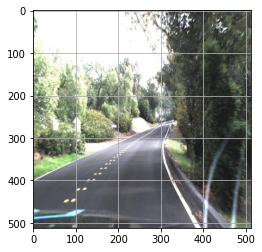

In [71]:
predicty()

false


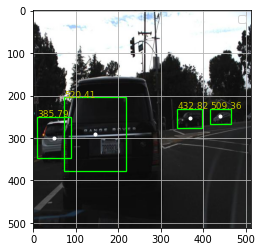

In [72]:
predicty()

false


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


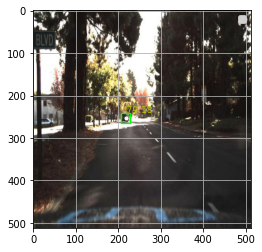

In [73]:
predicty()

false


/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


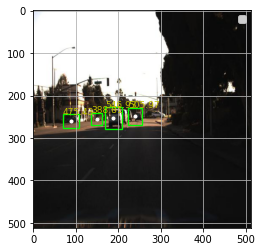

In [74]:
predicty()